## ETAPA 1 - Simula√ß√µes num√©ricas

#### 1. Elabora√ß√£o do diagrama do modelo eletrodin√¢mico do circuito WPT

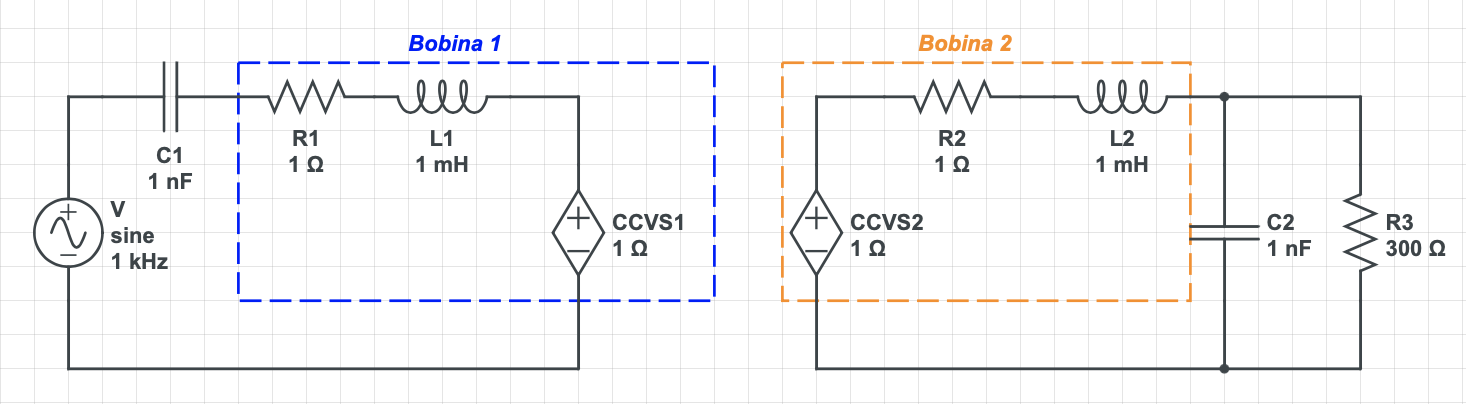

In [29]:
from IPython import display
display.Image("circuitoWPT.png")

#### 2. C√≥digo do modelo num√©rico

In [30]:
#Vamos importar os m√≥dulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np

In [31]:
Ufonte = 10
R1 = 0.5    
R2 = 0.5
L1 = 10e-3
L2 = 10e-3
C1 = 1e-9
C2 = 1e-9
K = 0.2

In [32]:
def calcula_transformador(Uf, Rc,Freq):
    XL1 = 1j * 2*pi*Freq*L1
    XL2 = 1j * 2*pi*Freq*L2
    XM = 1j * 2*pi*Freq * K * sqrt(L1*L2)
    XC1 = 1/(1j * 2*pi*Freq*C1)
    XC2 = 1/(1j * 2*pi*Freq*C2)
    Rpara = ((Rc*XC2)/ (Rc+XC2))
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, R2+XL2+ Rpara ]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)

    v2 = i[1] * Rpara
    return i[0], i[1], v2

In [33]:
Rcarga = 300
i1, i2, v2 = calcula_transformador(Ufonte, Rcarga,60)

print('Com resistor na sa√≠da de %.2f Œ©:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Rela√ß√£o N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Rela√ß√£o i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Rela√ß√£o V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))




Com resistor na sa√≠da de 300.00 Œ©:
i1 (eficaz) = 0.00 A
i2 (eficaz) = 0.00 A
V1 (eficaz): 10.00 V
V2 (eficaz): 0.00 V
Rela√ß√£o N1/N2: 1.00
Rela√ß√£o i2/i1: 0.00
Rela√ß√£o V1/V2: 3524227.43


#### 3. Constru√ß√£o de gr√°ficos de I1 e I2 em fun√ß√£o da frequ√™ncia

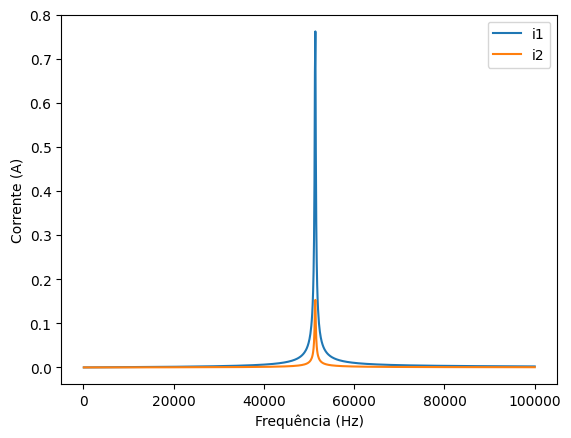

In [34]:
freq = np.linspace(100,100000,1000)
i1 = []
i2 = []
for f in freq:
    i_1  = calcula_transformador(Ufonte, Rcarga,f)[0]
    i_2  = calcula_transformador(Ufonte, Rcarga,f)[1]
    i1.append(abs(i_1))
    i2.append(abs(i_2))

import matplotlib.pyplot as plt
plt.plot(freq,i1)
plt.plot(freq,i2)
plt.xlabel('Frequ√™ncia (Hz)')
plt.ylabel('Corrente (A)')
plt.legend(['i1','i2'])
plt.show()


#### Encontrando frequ√™ncia do pico de corrente

In [35]:
corrente_max = max(i1)
print('Corrente m√°xima: %.2f A' %corrente_max)
index_max = i1.index(corrente_max)
freq_max = freq[index_max]
print('Frequ√™ncia de resson√¢ncia: %.2f Hz' %freq_max)

Corrente m√°xima: 0.76 A
Frequ√™ncia de resson√¢ncia: 51400.00 Hz


A frequ√™ncia para a qual as correntes s√£o m√°ximas √© coincidente com a frequ√™ncia de resson√¢ncia que foi obtida na atividade 1.

k = fator de acoplamento (constante) = medida da quantidade de acoplamento entre duas bobinas ou indutores em um circuito

Indica a efici√™ncia com que a energia magn√©tica √© transferida de uma bobina para outra. Varia entre 0 e 1.

Um fator de acoplamento de 1 indica um acoplamento perfeito, onde toda a energia magn√©tica gerada por uma bobina √© transferida para a outra bobina. Um fator de acoplamento de 0 indica um acoplamento nulo, onde n√£o h√° transfer√™ncia de energia entre as bobinas.

O fator de acoplamento pode ser calculado usando a f√≥rmula:

k = M / ‚àö(L1 * L2)

A indut√¢ncia m√∫tua (M) √© uma medida da intera√ß√£o magn√©tica entre as bobinas e depende da geometria e posicionamento das bobinas no circuito. Quanto maior a indut√¢ncia m√∫tua, maior ser√° o acoplamento entre as bobinas e, portanto, maior ser√° o fator de acoplamento. A medida em que k varia, a amplitude do gr√°fico muda. 

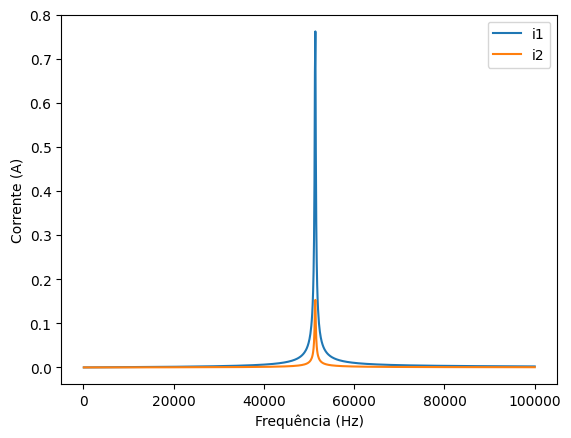

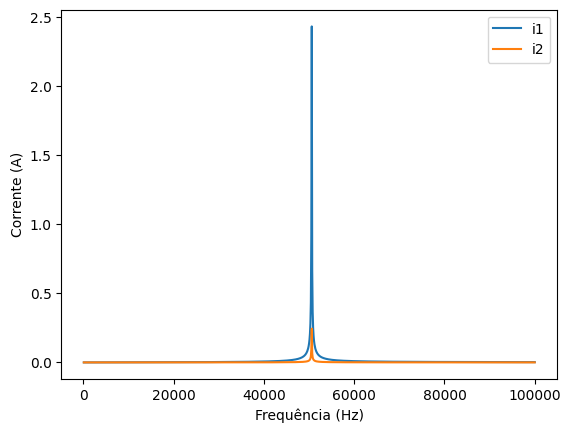

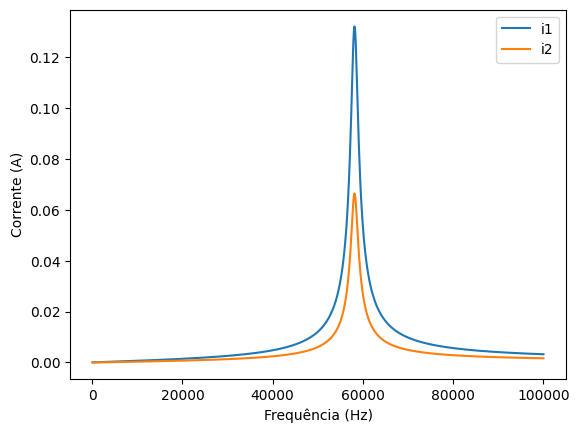

In [36]:
lista_de_k = np.linspace(0.1,0.9,3)

for k in lista_de_k:
    i1 = []
    i2 = []
    for f in freq:
        i_1  = calcula_transformador(Ufonte, Rcarga,f)[0]
        i_2  = calcula_transformador(Ufonte, Rcarga,f)[1]
        i1.append(abs(i_1))
        i2.append(abs(i_2))
    K = k
    plt.plot(freq,i1)
    plt.plot(freq,i2)
    plt.xlabel('Frequ√™ncia (Hz)')
    plt.ylabel('Corrente (A)')
    plt.legend(['i1','i2'])
    plt.show()




#### 4. Constru√ß√£o de um gr√°fico do m√≥dulo da tens√£o V2 pela frequ√™ncia de resson√¢ncia, para 6 diferentes indut√¢ncias:

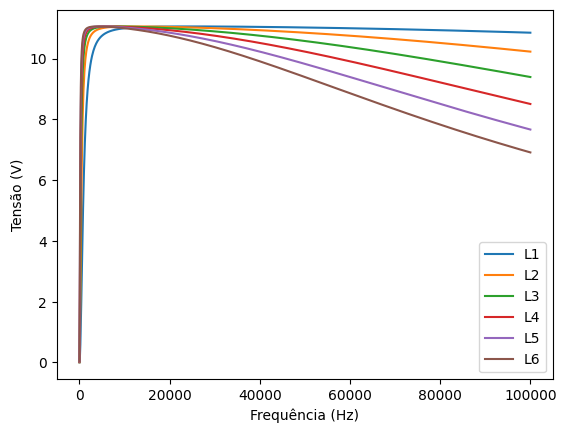

In [37]:
Rc = 300 # 300 Ohms
indutancias = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006] # Valores de indut√¢ncia em H
frequencias = np.linspace(10, 100000, 1000) # Valores de frequencia em Hz (devia ser 6)

for L in indutancias:
    L1 = L
    L2 = L
    V2=[]
    for f in frequencias:
        C = 1/(4*(pi**2)*(f**2)*(L)) 
        C1 = C 
        C2 = C
        i1, i2, v2 = calcula_transformador(Ufonte, Rc, f)
        V2.append(abs(v2))
    plt.plot(frequencias, V2)
    plt.xlabel('Frequ√™ncia (Hz)')
    plt.ylabel('Tens√£o (V)')
    plt.legend(['L1','L2','L3','L4','L5','L6',])
plt.show()


#### 5. Constru√ß√£o de gr√°ficos das pot√™ncias e da efici√™ncia em fun√ß√£o da frequ√™ncia

#### 6. Constru√ß√£o de um gr√°fico que relacione o valor de pico da tens√£o no secund√°rio (no resistor ùëÖùê∂ ) com o coeficiente de acoplamento ùëò